In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Warsaw_rent_cleaned.csv')
#usuwam zmienne zależne
df = df.drop(['rooms','poiCount'],axis=1)
df.head()

,squareMeters,floor,floorCount,latitude,longitude,centreDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,type_numerical,month,price
0,47.0,8.0,9.0,52.257912,20.968610,3.76,1,1,1,0,0,0,11,5000
1,27.0,3.0,7.0,52.249800,21.035200,2.95,1,1,1,0,0,-1,11,2950
2,51.0,5.0,7.0,52.222864,21.009959,1.08,0,1,1,0,0,0,11,3700
3,50.0,3.0,5.0,52.224948,21.012136,0.95,0,0,1,0,0,1,11,5000
4,39.8,2.0,3.0,52.216513,21.041474,3.09,0,0,0,0,0,1,11,4500


In [5]:
from sklearn.model_selection import train_test_split
X=df.drop('price', axis=1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)
# train model
dtr.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=3, random_state=2529)

In [7]:
# evaluate the model on training sample
dtr.score(X_train,y_train)

0.6362733208273001

In [8]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)


{'fit_time': array([0.03967571, 0.0395472 , 0.03208661, 0.03915143, 0.03604198]),
 'score_time': array([0.00987577, 0.01240635, 0.01089621, 0.00689507, 0.00947094]),
 'test_score': array([0.63377962, 0.62440512, 0.62498302, 0.5799353 , 0.6372993 ])}

In [9]:
# evaluate the model on the test sample
dtr.score(X_test,y_test)

0.59534665981235

In [10]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [11]:
# hyperparameters selection
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [12]:
# import pipeline
from sklearn.pipeline import Pipeline
# define pipe line
pipe = Pipeline([('model', dtr)])

In [13]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [14]:
# train grid search
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [15]:
# find best parama
grid.best_params_
# select best estimator
best = grid.best_estimator_

In [16]:
# fit best estimator
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=10, random_state=2529))])

In [24]:
# Ocena modelu Random Forest na danych testowych
score_ = best.score(X_test, y_test)
print(f"Współczynnik determinacji (R^2) dla modelu Random Forest: {score_:.2f}")


Współczynnik determinacji (R^2) dla modelu Random Forest: 0.74


In [17]:
# predict with best estimator
y_pred=best.predict(X_test)

In [18]:
# model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
# mean absolute error
mean_absolute_error(y_test,y_pred)

659.7625945221404

In [19]:
mean_absolute_percentage_error(y_test,y_pred)

0.14037457460033081

In [20]:
# r square
r2_score(y_test,y_pred)

0.7427692546142

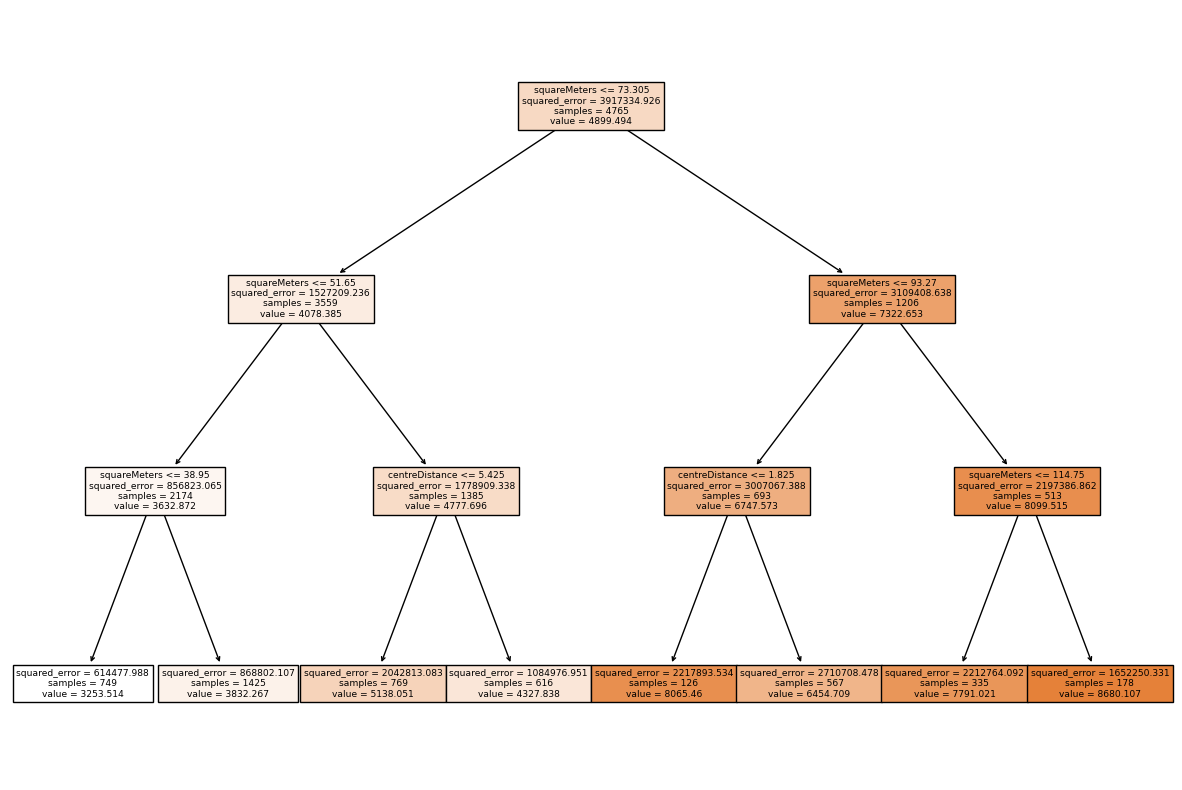

In [21]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train,y_train)
plot_tree(final,feature_names=X.columns,filled=True);

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Inicjalizacja modelu Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu na danych treningowych
rf_model.fit(X_train, y_train)

# Przewidywanie cen na danych testowych
y_pred_rf = rf_model.predict(X_test)

# Ocena modelu
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Średni błąd kwadratowy (MSE) dla modelu Random Forest: {mse_rf}")

# Procentowy poziom dopasowania
przedzial_cenowy = 50000
poprawnie_przewidziane_rf = np.abs(y_test - y_pred_rf) <= przedzial_cenowy
dopasowanie_procentowe_rf = np.sum(poprawnie_przewidziane_rf) / len(y_test) * 100

print(f"Procentowy poziom dopasowania dla modelu Random Forest w przedziale +/- {przedzial_cenowy} PLN: {dopasowanie_procentowe_rf:.2f}%")


Średni błąd kwadratowy (MSE) dla modelu Random Forest: 552779.0778270251
Procentowy poziom dopasowania dla modelu Random Forest w przedziale +/- 50000 PLN: 100.00%


In [25]:
# Ocena modelu Random Forest na danych testowych
score_rf = rf_model.score(X_test, y_test)
print(f"Współczynnik determinacji (R^2) dla modelu Random Forest: {score_rf:.2f}")


Współczynnik determinacji (R^2) dla modelu Random Forest: 0.85
